# IML Assignment 1

## Name: Ilia Mitrokhin


## Mail: i.mitrokhin@innopolis.university


## Group: DS-02

### Code style policy

We expect you to follow https://peps.python.org/pep-0008/ Python standart style and will reduce your points if you don't. Also we ask you to comment your code when it's needed (logical blocks, function declaration, loops), however over-documentation is the evil.

Example of nice code style (no need to run this cells):

In [ ]:
# This function returns the sum of parameters
# @param my_param1 - here I explain what this parameter means
# @param my_param2 - here I explain what this parameter means
# @return - result of func if it's not void
def my_func(my_param1: int, my_param2: int)
    return my_param1 + my_param2

There are few lines only, but they are represents important logical blocks, thus you should explain what their purpose:

In [ ]:
from my_training_package import my_regression, my_loader

# Data loading
x, y = my_loader.load("some.csv")

# Training
reg = my_regression()
reg.train(x,y)

# Evaluation on the same data set
y_pred = reg.evaluation(y)

ModuleNotFoundError: No module named 'my_training_package'

Example of too detailed and meaningless commenting that is not welcome:

In [ ]:
# Import numpy package
import numpy as np
# This is variable x
x = 5
# This is variable y
y = 10
# Print x
print(x)

5


Ultimately, we belive in your programming common sense :) The purpose of clear code style is fast and smooth grading of your implementation and checking that you understand ML concepts.

## Task 1

### 3.1. Linear Regression
#### Data reading

In [ ]:
import pandas as pd
# Loading the data set
df = pd.read_csv('/content/train_1.csv')

#### Train\validation splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into training and validation parts.
X = df.iloc[:,1:5]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

#### Linear regression model fitting

In [ ]:
from sklearn.linear_model import LinearRegression

# Declare and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

# Prediction by model on the X_test set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [ ]:
from sklearn import metrics
import numpy as np

def print_metrics(y_actual, y_pred):
    """
    Function prints MSE, RMSE, MAE and R2 score for the current model
    :param y_actual:  y_test array of target variables
    :param y_pred: array of predicted output by our model
    :return: None
    """
    # Calculating and printing MSE, RMSE, MAE and R2 score using metrics
    print("Mean squared error: ", metrics.mean_squared_error(y_actual,y_pred))
    print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_actual,y_pred)))
    print("Mean absolute value: ", metrics.mean_absolute_error(y_actual, y_pred))
    print("Coefficient of determination", metrics.r2_score(y_actual, y_pred))
print_metrics(y_test, y_pred_lr)

NameError: name 'y_pred_lr' is not defined

### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# Creating polynomial feature class with degree = 2
polynomial_features = PolynomialFeatures(degree=2)
# Creating linear regression
linear_regression = LinearRegression()
# Creating pipeline
pipeline = make_pipeline(polynomial_features, linear_regression)
# Fit data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

#### Tuning the degree hyper-parameter using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
# Declare a GridSearch instance
param_grid = {'polynomialfeatures__degree': list(range(2,6))}
# Creating GridSearchCV
search = GridSearchCV(pipeline, param_grid=param_grid, cv=8, scoring='neg_mean_squared_error')
# Creating best model
search.fit(X_train,y_train)
best_model = search.best_estimator_
# Printing the optimum degrees
print(f"Best parameter (CV score={search.best_score_}): {search.best_params_}" )
print()

Best parameter (CV score=-0.43274674709469363): {'polynomialfeatures__degree': 4}


In [ ]:
# Obtain prediction values for new model
y_pred = best_model.predict(X_test)
print_metrics(y_test,y_pred)

Mean squared error:  0.2158002763836941
Root mean squared error:  0.4645430834526482
Mean absolute value:  0.3652365987952139
Coefficient of determination 0.9999915549375944


#### Save the model

In [ ]:
import pickle

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

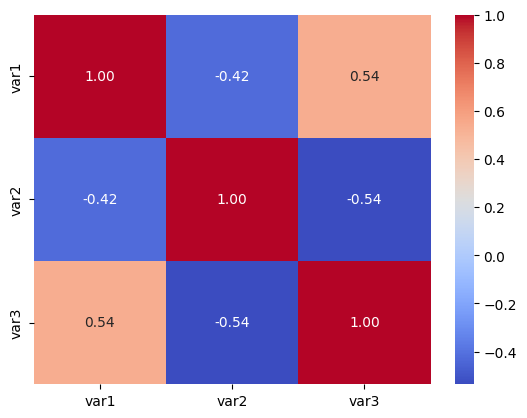

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
# Calculate and plot the correlation matrix (as heatmap)
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

From the correlation matrix we may see strong linear relationship between x3 and x2. When one feature increases, other decreases (due to - sign) and due to 0.99 coefficient when one variable changes, second variable changes linearly. As x2 increases, x3 decreases.

## Task 2

### Data processing
#### Loading the dataset

In [ ]:
import pandas as pd

#### Exploring the dataset  and removing 2 redundant features

In [ ]:
# Reading data
data = pd.read_csv('/content/pokemon_modified.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/pokemon_modified.csv'

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [ ]:
from sklearn.model_selection import train_test_split
# Removing name and percentage_male column. Obviously, name column isn't
# relevant, and as the second feature to delete I choose classification.
# My assumption that it doesn't provide significant influence (or doesn't
# provide at all)
# Drop unnecessary columns and split data
data = data.drop(['name','classification'], axis = 1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
# Splitting data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

Check if the dataset is balanced or not and comment on it

In [ ]:
# To understand it, let's calculate how many legendary and non legendary
# pocemons we have
balance_check = data['is_legendary'].value_counts()
print(balance_check)
#By the output we can see, that dataset isn't balanced: amount of non-legendary
# pocemons is much more

0    731
1     70
Name: is_legendary, dtype: int64


#### Checking for missing values

In [ ]:
# Calculate NAN values in each column and print it
missed_values_train = X_train.isnull().sum()
missed_values_test = X_test.isnull().sum()
print(missed_values_train)
print()
print(missed_values_test)

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             14
hp                    0
percentage_male      72
type1                 0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            14
generation            0
dtype: int64

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
ag

#### Impute the missing values

In [ ]:
from sklearn.impute import SimpleImputer
# Create imputer with strategy mean and specify the columns to impute
imputer = SimpleImputer(strategy='mean')
columns_to_impute = ['height_m','weight_kg','percentage_male']
# Fit and transform the imputer on the training data
imputer.fit(X_train[columns_to_impute])
X_train[columns_to_impute] = imputer.transform(X_train[columns_to_impute])
# Transform the imputer on the testing data
X_test[columns_to_impute] = imputer.transform(X_test[columns_to_impute])

#### Double check that there are no missing values

In [ ]:
# Calculate NAN values in each column and print it
mis_val_train = X_train.isnull().sum()
mis_val_test = X_test.isnull().sum()
print(mis_val_train)
print()
print(mis_val_test)

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost       

#### Encode categorically

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder and specify columns to be encoded
encoder = OneHotEncoder(sparse_output=False, drop=None)
f_names = ['type1']
def encoding (df,feature_names,encoder):
    '''
    This function performs splitting and concatanation of the parsed type_1
    column and initial dataset
    :param df : dataFrame to be concatenated
    :param feature_names : set of columns to be encoded
    :param encoder: OneHotEncoder.
    :return new_df with encoded initial columns
    '''
    # Perform OneHotEncoding for specified columns and concatanate with initial
    # df
    X_encoded = encoder.fit_transform(df[f_names])
    encoded_columns = encoder.get_feature_names_out(f_names)
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)
    new_df = pd.concat([df.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)
    new_df.drop(f_names, axis=1, inplace=True)
    return new_df

# Call encoding function
X_test = encoding(X_test,f_names, encoder)
X_train = encoding(X_train,f_names, encoder)



#### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# Define MinMaxScaler, fit it and transform
scaler = MinMaxScaler()
X_train_MMS = scaler.fit_transform(X_train)
X_test_MMS = scaler.fit_transform(X_test)
# Keep X_train and X_test as pandas DF for convenience
X_train = pd.DataFrame(X_train_MMS, columns=X_train.columns)
X_test = pd.DataFrame(X_test_MMS, columns=X_test.columns)

#### Confusion Matrix

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

<Axes: >

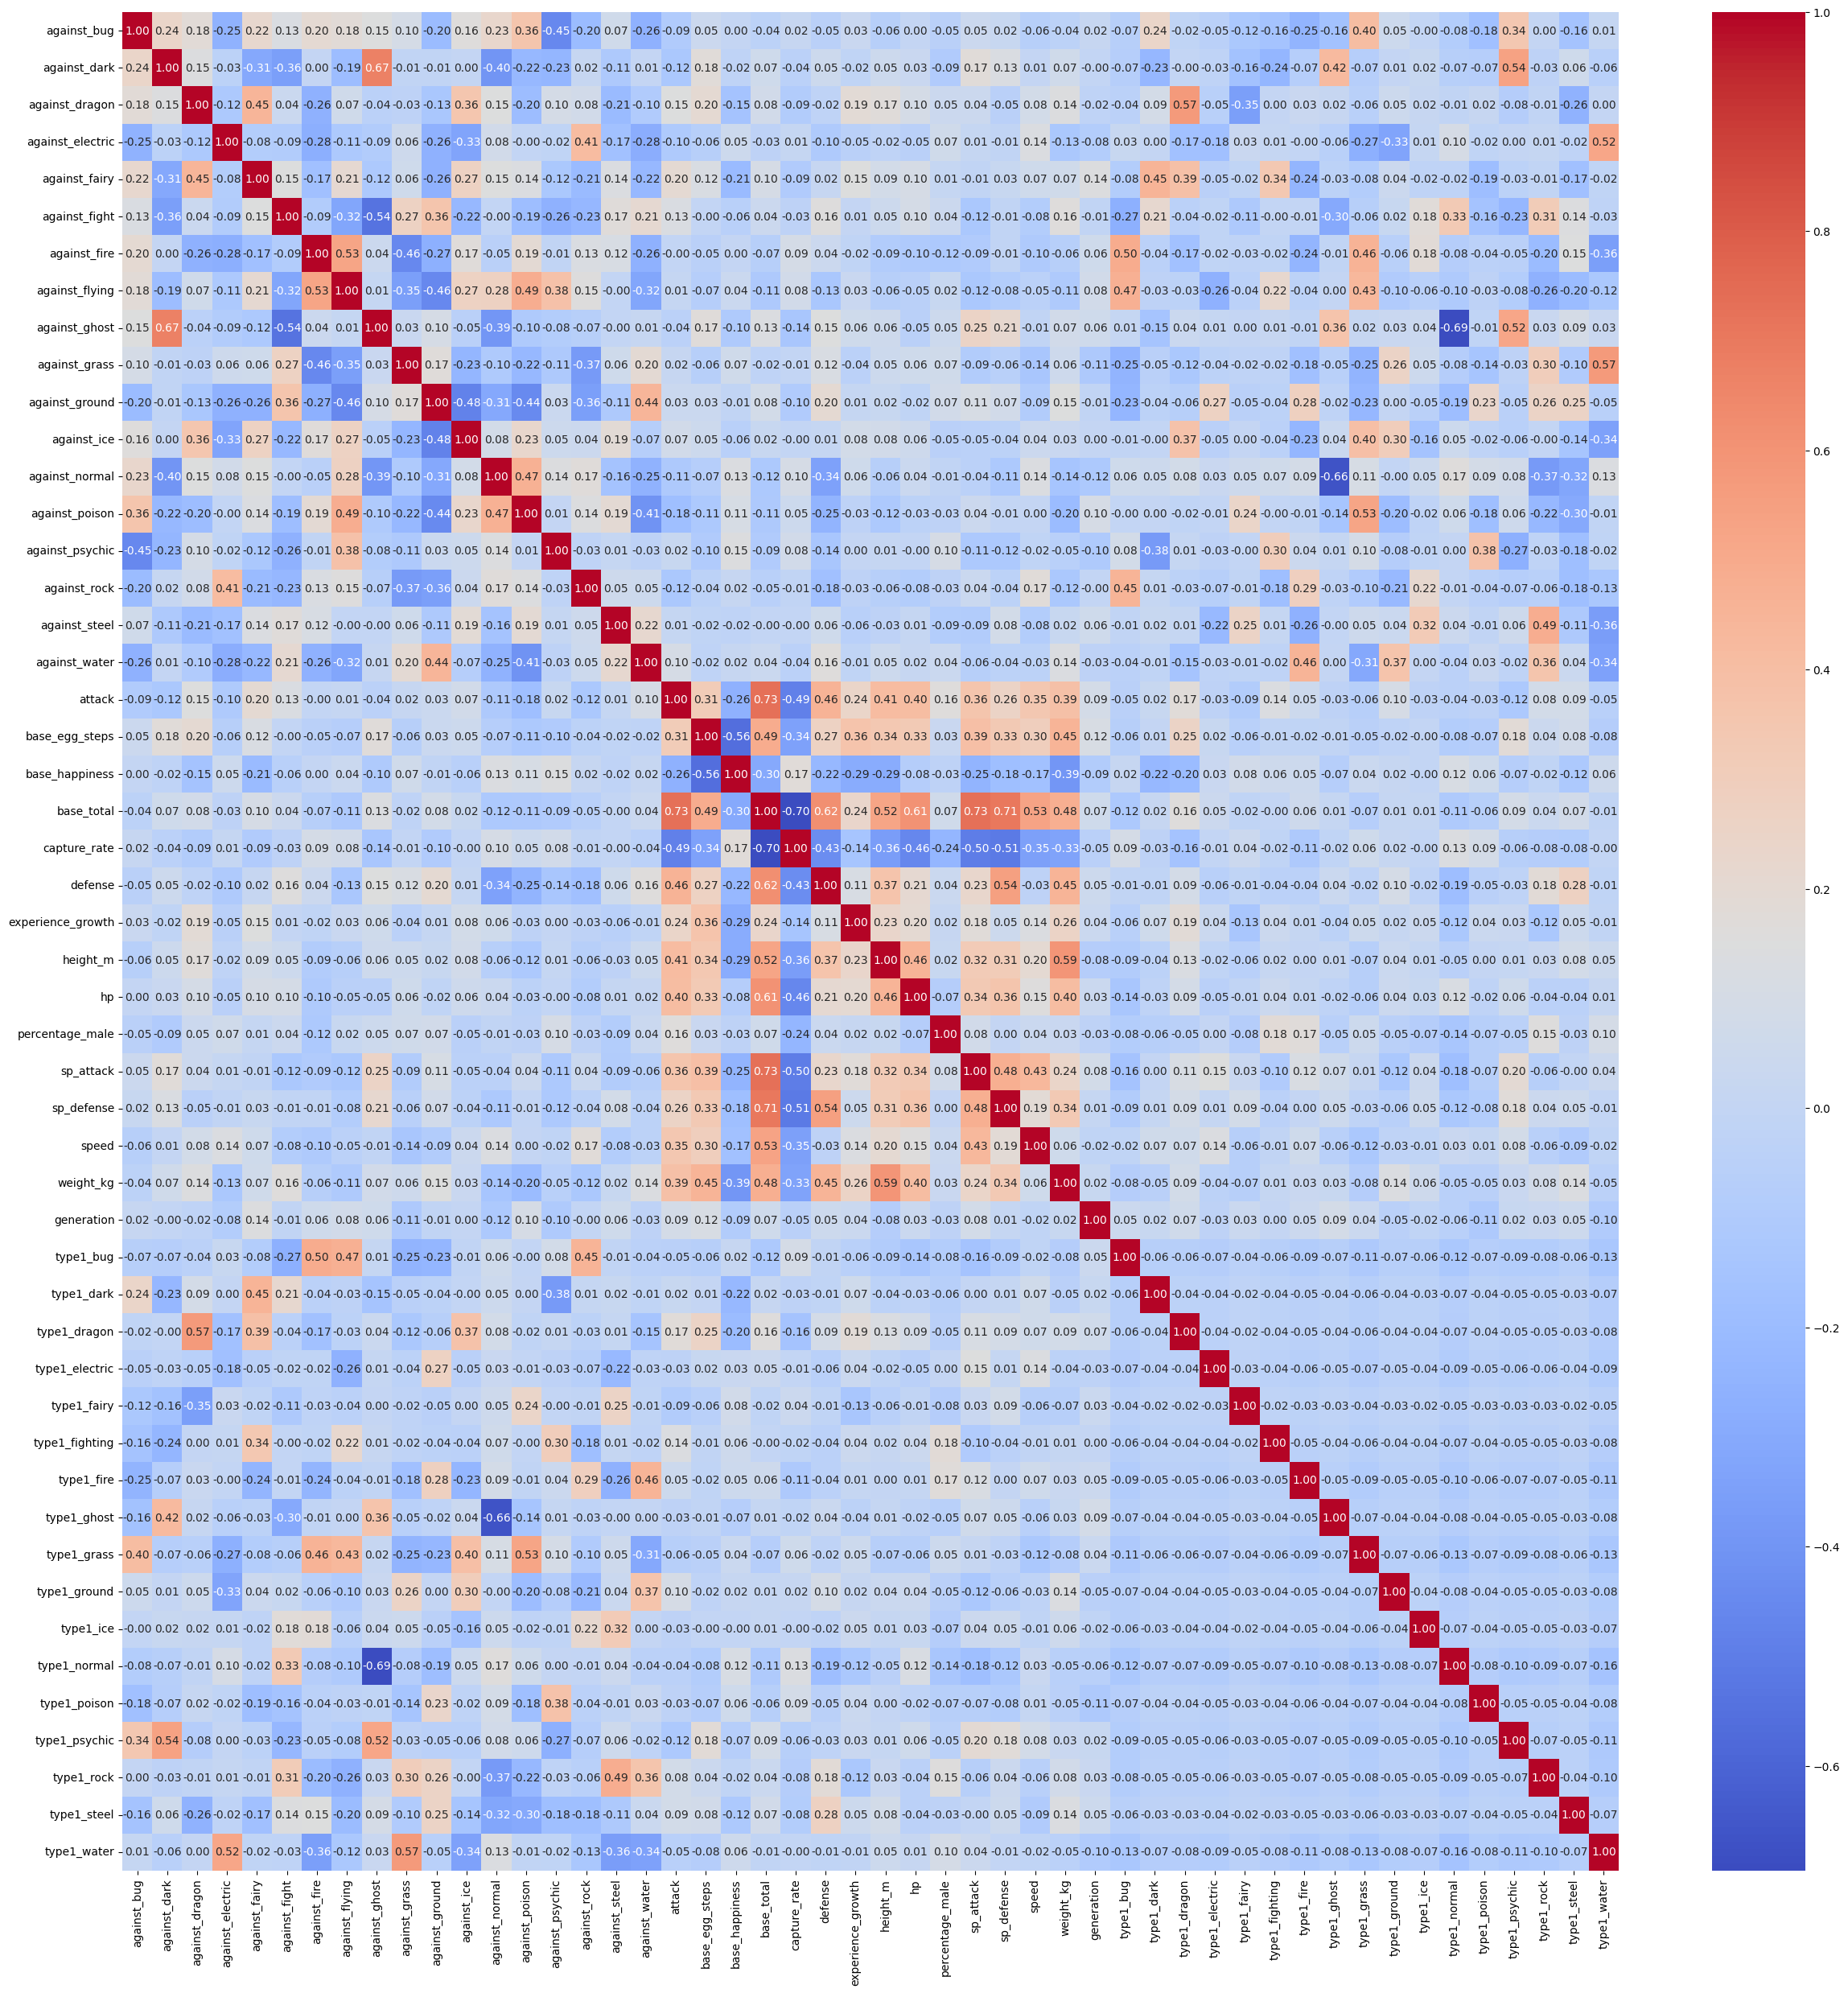

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))

# Calculate and plot the correlation matrix
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

We have correlated features in this dataset. The biggest values shows that this special characteristic of the pocemon may influence its type, power, etc. But this is absolutely fine for our task and our life, because, for example, if we put more efforts to study then our grades are better. Same situation is here, if, for example, attacking and defending influence total score of the pocemon. It is naturally and normal. Additionally, if we'll print the most influening features, we'll see that this columns are not  highly-correlated with some 'dangerous' data.

### Model fitting and Comparison

#### Tuning LR model

In [ ]:
def print_clf_metrics(y_actual, y_pred ):
    '''
    This function prints performance metrics of a model
    :param y_actual : actual target values df
    :param y_pred : predicted target values df
    :return None
    '''
    print("Accuracy score: ",metrics.accuracy_score(y_actual, y_pred))
    print("Precision score: ", metrics.precision_score(y_actual, y_pred))
    print('Recall score: ', metrics.recall_score(y_actual, y_pred))
    print('F1 score: ', metrics.f1_score(y_actual, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
# Specify parameters for Grid Search (l1 not included, because it can't work)
# with 'liblinear' and 'lbfgs'
param_grid_LR = {'penalty' : ['l2'],
              'C' : np.logspace(-3,3,7),
              'solver' : ['liblinear' , 'lbfgs', 'newton-cg'],
              }
# Setup LR and find best parameters
estimator_LR = LogisticRegression(max_iter=1000)
parameters_LR = GridSearchCV(estimator_LR,param_grid_LR, cv=5, scoring='f1',error_score='raise')
parameters_LR.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             scoring='f1')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Declare logistic regression inside GridSearchCV with the best parameters
# print(parameters_LR.best_score_)
lr_clf_gs = parameters_LR.best_estimator_
y_pred_LR = lr_clf_gs.predict(X_test)
print_clf_metrics(y_test, y_pred_LR)

Accuracy score:  0.9813664596273292
Precision score:  0.8888888888888888
Recall score:  0.9411764705882353
F1 score:  0.9142857142857143


In [ ]:
# print info about model
print("Tuned Hyperparameters :", parameters_LR.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_LR))

Tuned Hyperparameters : {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.9813664596273292


#### Construct a LR with the best params and Evaluate the LR with the best params

In [ ]:
# Created LR with the derived parameters
lr_clf = lr_clf_gs
lr_y_pred = lr_clf.predict(X_test)

In [ ]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy score:  0.9813664596273292
Precision score:  0.8888888888888888
Recall score:  0.9411764705882353
F1 score:  0.9142857142857143


#### Print the top 5 most influencing features and the top 5 ignored features

In [ ]:
# TODO Write your code here
# Get the coefficients, sort it and print
coefficients = lr_clf.coef_[0]
feature_coefficients = list(zip(X_train.columns, coefficients))
sorted_feature_coefficients = sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: x[1])
print("Least 5 features")
for feature_name in sorted_feature_coefficients[:5]:
    print(f"{feature_name}")

print("Top 5 features")
for feature_name in sorted_feature_coefficients[-5:]:
    print(f"{feature_name}")

Least 5 features
('capture_rate', -9.895867364859548)
('type1_normal', -8.280738226308037)
('against_dragon', -5.513880166572143)
('height_m', -5.068818823301342)
('against_fight', -4.690565593053387)
Top 5 features
('defense', 3.6460473989633115)
('speed', 6.733821847980914)
('base_total', 7.823096166076935)
('experience_growth', 8.095493834019369)
('base_egg_steps', 12.429765410225727)


#### Tuning KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Specify parameters for Grid Search
param_grid_KNN = {'n_neighbors': list(range(1,15)),
              'weights' : ['uniform','distance'],
              'metric' : ['euclidean', 'manhattan','chebyshev','cosine']}
# Setup KNN and check the performance
knn_clf_gs = KNeighborsClassifier()
parameters_knn = GridSearchCV(knn_clf_gs, param_grid_KNN,error_score='raise')
parameters_knn.fit(X_train,y_train)
y_pred_KNN = parameters_knn.predict(X_test)
print("Tuned Hyperparameters :", parameters_knn.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test,y_pred_KNN))

Tuned Hyperparameters : {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.968944099378882


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [ ]:
# Setup best KNN model
knn_clf = parameters_knn.best_estimator_
knn_y_pred = knn_clf.predict(X_test)
print_clf_metrics(y_test, knn_y_pred)
# print(parameters_knn.best_score_)

Accuracy score:  0.968944099378882
Precision score:  0.9285714285714286
Recall score:  0.7647058823529411
F1 score:  0.8387096774193549
0.959375


#### Fitting GNB to the data and evaluating on the test dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Setup GaussianNB and check the performance
gauss_nb_clf = GaussianNB()
gauss_nb_clf.fit(X_train,y_train)
gauss_y_pred = gauss_nb_clf.predict(X_test)
print_clf_metrics(y_test, gauss_y_pred)

Accuracy score:  0.9130434782608695
Precision score:  0.5517241379310345
Recall score:  0.9411764705882353
F1 score:  0.6956521739130435


#### Which metric is most appropriate for this task and why?
 F1 score. It takes into account that data is unbalanced.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [ ]:
# Pringting metrics of the models (MinMaxScaler)
print('Logistic regression metrics:')
print_clf_metrics(y_test, lr_y_pred)
print()
print('K nearest neighbour classifier metrics:')
print_clf_metrics(y_test, knn_y_pred)
print()
print('GNB metrics:')
print_clf_metrics(y_test, gauss_y_pred)

Logistic regression metrics:
Accuracy score:  0.9813664596273292
Precision score:  0.8888888888888888
Recall score:  0.9411764705882353
F1 score:  0.9142857142857143

K nearest neighbour classifier metrics:
Accuracy score:  0.968944099378882
Precision score:  0.9285714285714286
Recall score:  0.7647058823529411
F1 score:  0.8387096774193549

GNB metrics:
Accuracy score:  0.9130434782608695
Precision score:  0.5517241379310345
Recall score:  0.9411764705882353
F1 score:  0.6956521739130435


By the metrics results we can see that the most appropriate model for this task is Logistic regression. Only one place where KNN is better is precision. But, overall, all other metrics are better in Logistic regression. Additionally, I found at https://www.statology.org/f1-score-vs-accuracy/ that F1 seems to be the best way to describe a model in which data is unbalanced (as we have), because F1 score takes into account that data is unbalanced. Additionally Logistic Regression is more preferable, because KNN takes much more computatioonal efforts but doesn't provide significant changes to the better results

## 5. Bonus Task

#### Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
# Read input data
train_data = pd.read_csv('/content/bonus_train.csv')
test_data = pd.read_csv('/content/bonus_test.csv')
# train_data.head()

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_data.iloc[:,0:3], test_data.iloc[:,0:3], train_data.iloc[:,-1:], test_data.iloc[:,-1:]
print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns]      target
0         2
1         1
2         1
3         0
4         0
..      ...
265       2
266       1
267       0
268       0
269       0

[270 rows x 1 columns]           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.2

1####  Plot the data using the pairplot in sns

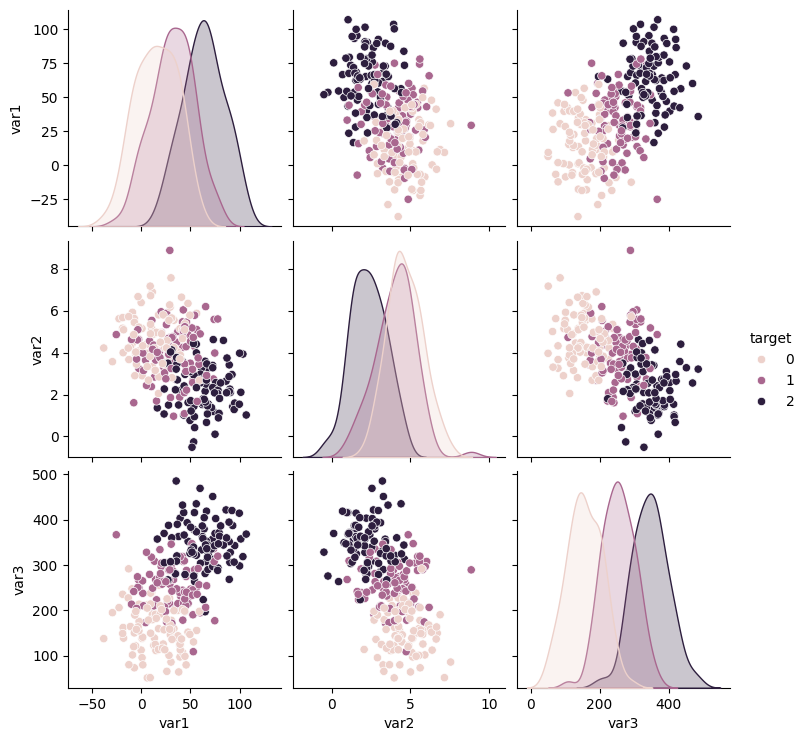

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot features and target data
sns.pairplot(train_data, kind='scatter',hue='target')

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Create and fit LR (multi_class='ovr')
ovr_lr = LogisticRegression(multi_class='ovr')
ovr_lr.fit(X_train,y_train.to_numpy().ravel())
# Evaluate model
ovr_pred = ovr_lr.predict(X_test)
print(metrics.accuracy_score(y_test, ovr_pred))

0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [ ]:
# Create and fit LR (multi_class='multinomial')
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
multi_lr.fit(X_train,y_train.to_numpy().ravel())
# Evaluate model
multi_lr_pred = multi_lr.predict(X_test)
print(metrics.accuracy_score(y_test, multi_lr_pred))

0.9


#### Using gridsearch to tune the C value and multi class

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create model with a gridSearch to find the best parameters
param_grid = {'C': np.logspace(-10, 10, 7),
    'multi_class': ['multinomial', 'ovr']}
estimator = LogisticRegression(max_iter=1000)
params = GridSearchCV(estimator,param_grid)
params.fit(X_train,y_train.to_numpy().ravel())
grid_search_clf = params.best_estimator_

In [ ]:
# Evaluate model
y_pred = grid_search_clf.predict(X_test)
print("Tuned Hyperparameters :", params.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test,y_pred))

Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.8333333333333334


#### Comment on why one multi_class technique was better than the other

Grid search may not capture something for this task, because the range of C is bounded. Maybe, if we'll try to explore another value of C, we'll obtain better result.
Therefore, linear regression performs better.


#### Create LR with the best params

In [ ]:
# Create LR with best parameters
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
multi_lr.fit(X_train,y_train.to_numpy().ravel())

LogisticRegression(max_iter=1000, multi_class='multinomial')

#### Visualize the decision boundaries

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


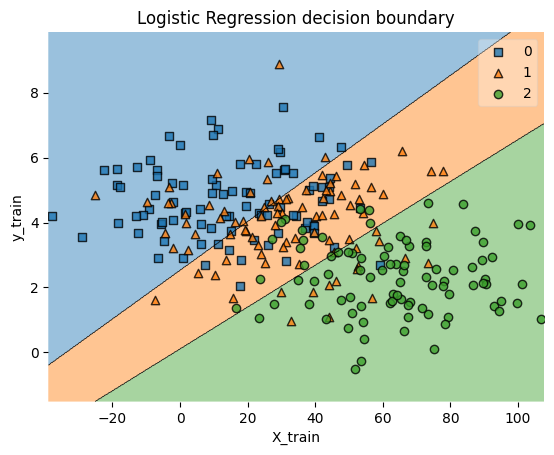

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
# Train a model (on 2 features)
X_train_2f = X_train.iloc[:,:2]
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
multi_lr.fit(X_train_2f,y_train.to_numpy().ravel())
# Make a plot of decision regions
plot_decision_regions(X_train_2f.to_numpy(),y_train.to_numpy().ravel(), clf=multi_lr)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?

Overall the model performs well, but due to the fact that the data distributed in wide range, some outliers appear. A lot of data from 0 and 2 type falls within 1 st class interval. So, in my opinion, model is good.